In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 导入数据集

## 1.1 读取文件 txt2csv

In [2]:
path = 'LogiReg_data.txt'
colnames = ['Exam 1', 'Exam 2', 'Admitted']
dataset = pd.read_csv(path, header=None, names=colnames)

## 1.2 查看（首尾）数据

In [3]:
dataset.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
dataset.tail()

,Exam 1,Exam 2,Admitted
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


## 1.3 数据统计信息

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Exam 1      100 non-null float64
Exam 2      100 non-null float64
Admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


**无空数据，不需要额外处理**

In [6]:
dataset.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


## 1.4 数据示图

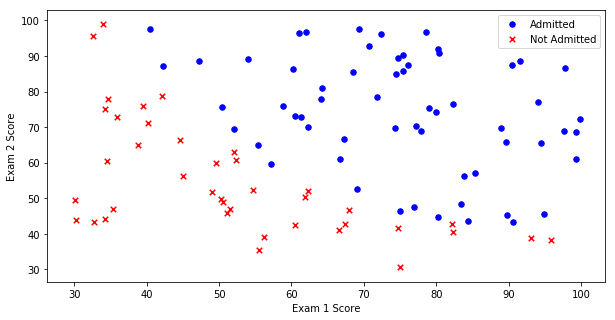

In [7]:
positive = dataset[dataset['Admitted'] == 1] 
negative = dataset[dataset['Admitted'] == 0]
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, color='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, color='r', marker='x', label='Not Admitted')
ax.legend(), ax.set_xlabel('Exam 1 Score'), ax.set_ylabel('Exam 2 Score')
plt.show()

## 1.5 划分训练集与测试集

In [8]:
sampleNum = len(dataset)
k = int(sampleNum * 0.7)
traindata = dataset[:k]
testdata = dataset[k:]
print(f'traindata.shape={traindata.shape} \n testdata.shape={testdata.shape}')

traindata.shape=(70, 3) 
 testdata.shape=(30, 3)


# 2. 分类器设计

## 2.1 sigmoid 函数

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

**计算时可能会发生溢出，但不用理会。比如：**

In [10]:
np.exp(1000)

d:\program files\python\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf

**绘制sigmoid图像**

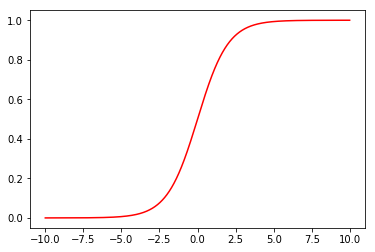

In [11]:
tmp_x = np.arange(-10.0, 10.0, 0.01)
plt.plot(tmp_x, sigmoid(tmp_x), 'r')
plt.show()

## 2.2 梯度下降法，求带正则项的代价函数的最小 θ

In [12]:
x_train = traindata.values[:,:2]
y_train = traindata.values[:, 2:3]       # 取出单独一列，保证是列向量，不然容易出问题
print(x_train.shape, y_train.shape)

(70, 2) (70, 1)


In [13]:
def grad_descent(X, Y, λ=0, α=0.01, cycleNum=1000):
    """
    输入参数：
        X：mxn 矩阵，np.array类型，数据集里的特征数据
        Y：mx1 列向量
        α：学习率
        n：最大迭代次数
        λ：正则项系数
    """
    m, n = X.shape
    X = np.hstack([np.ones((m, 1)), X])      # 为X增加偏置列
    XT = X.T                                 # 转置X
    weights = np.ones((n+1, 1))              # 模型系数向量 weights，nx1

    for k in range(cycleNum):               # 不建议使用 np.matrix类
        h = sigmoid(np.matmul(X, weights))   # 矩阵乘法，建议使用 np.matmul：  m x 3 ，3 x 1
        weights = weights - α * (np.matmul(XT, h - Y) - λ*weights)
        
    return weights

In [14]:
weights = grad_descent(x_train, y_train, λ=1)
print(weights)

[[-94891.51521142]
 [   785.12565184]
 [   724.68297534]]


d:\program files\python\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


## 2.3 构建预测模型

In [15]:
def classifier(X, weights):
    m, n = X.shape
    X = np.hstack([np.ones((m, 1)), X])      # 为X增加偏置列
    p = sigmoid(np.matmul(X, weights))
    predlabel = []
    for i in range(m):
        if p[i] > 0.5:
            predlabel.append(1)
        else:
            predlabel.append(0)
    return predlabel

## 2.4 预测正确率

In [16]:
def evaluate(reallabel, predlabel):
    sum = 0
    for r, p in zip(reallabel, predlabel):
        if r == p:
            sum += 1
    wrongNum = len(reallabel) - sum
    return sum/len(reallabel), wrongNum

In [17]:
x_test = testdata.values[:,:2]
y_test = testdata.values[:, 2:3]       # 取出单独一列，保证是列向量，不然容易出问题
y_pred = classifier(x_test, weights)
accuracy, wrongNum = evaluate(y_test, y_pred)
print (f'正确率是：{accuracy}\n识别错误个数：{wrongNum}')

正确率是：0.8666666666666667
识别错误个数：4


d:\program files\python\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


## 2.5 分类示图

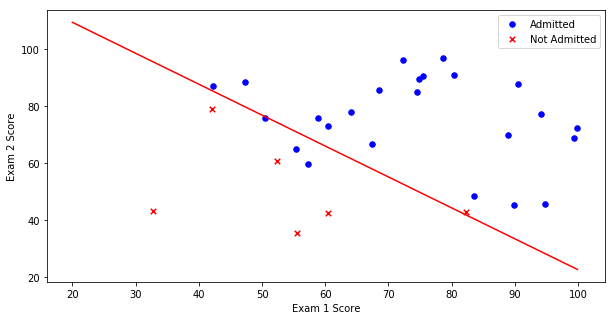

In [18]:
positive = testdata[testdata['Admitted'] == 1] 
negative = testdata[testdata['Admitted'] == 0]
x = np.arange(20.0, 100.0, 0.1)
y = (-weights[0] - weights[1] * x) / weights[2]
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y, 'r')
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, color='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, color='r', marker='x', label='Not Admitted')
ax.legend(), ax.set_xlabel('Exam 1 Score'), ax.set_ylabel('Exam 2 Score')
plt.show()